In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("co2.csv")
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [7]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [9]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [11]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [13]:
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.lower()
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size(l)', 'cylinders',
       'transmission', 'fuel_type', 'fuel_consumption_city_(l/100_km)',
       'fuel_consumption_hwy_(l/100_km)', 'fuel_consumption_comb_(l/100_km)',
       'fuel_consumption_comb_(mpg)', 'co2_emissions(g/km)'],
      dtype='object')

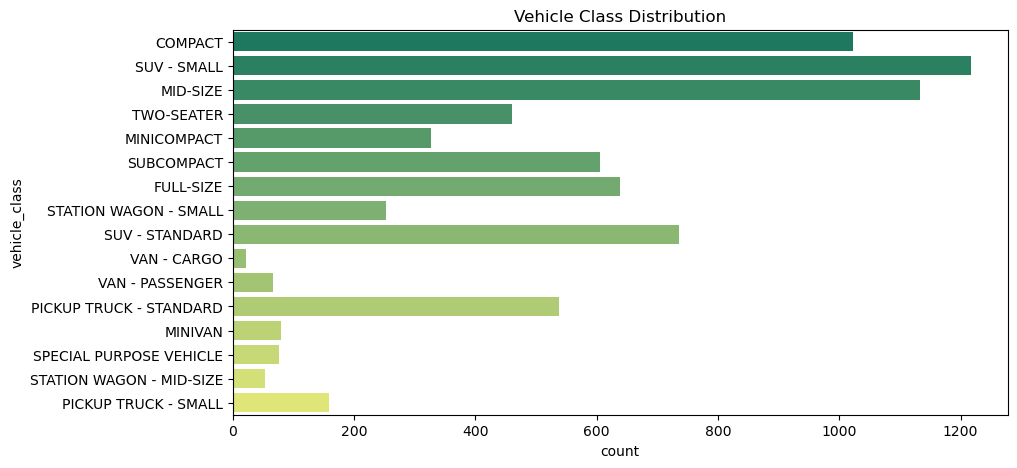

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='vehicle_class',hue='vehicle_class', palette='summer',legend=False)
plt.title('Vehicle Class Distribution')
plt.show()

__LABEL ENCODING__

In [18]:
from sklearn.preprocessing import LabelEncoder

In [20]:
label_encoder=LabelEncoder()

In [22]:
dfle=df
dfle.make=label_encoder.fit_transform(dfle.make)
dfle.model=label_encoder.fit_transform(dfle.model)
dfle.vehicle_class=label_encoder.fit_transform(dfle.vehicle_class)
dfle.transmission=label_encoder.fit_transform(dfle.transmission)
dfle.fuel_type=label_encoder.fit_transform(dfle.fuel_type)
dfle

,make,model,vehicle_class,engine_size(l),cylinders,transmission,fuel_type,fuel_consumption_city_(l/100_km),fuel_consumption_hwy_(l/100_km),fuel_consumption_comb_(l/100_km),fuel_consumption_comb_(mpg),co2_emissions(g/km)
0,0,1057,0,2.0,4,14,4,9.9,6.7,8.5,33,196
1,0,1057,0,2.4,4,25,4,11.2,7.7,9.6,29,221
2,0,1058,0,1.5,4,22,4,6.0,5.8,5.9,48,136
3,0,1233,11,3.5,6,15,4,12.7,9.1,11.1,25,255
4,0,1499,11,3.5,6,15,4,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,41,1951,11,2.0,4,17,4,10.7,7.7,9.4,30,219
7381,41,1957,11,2.0,4,17,4,11.2,8.3,9.9,29,232
7382,41,1960,11,2.0,4,17,4,11.7,8.6,10.3,27,240
7383,41,1968,12,2.0,4,17,4,11.2,8.3,9.9,29,232


__LINEAR REGRESSION__

In [25]:
X=df.drop("co2_emissions(g/km)",axis=1)
y=df["co2_emissions(g/km)"]
y

0       196
1       221
2       136
3       255
4       244
       ... 
7380    219
7381    232
7382    240
7383    232
7384    248
Name: co2_emissions(g/km), Length: 7385, dtype: int64

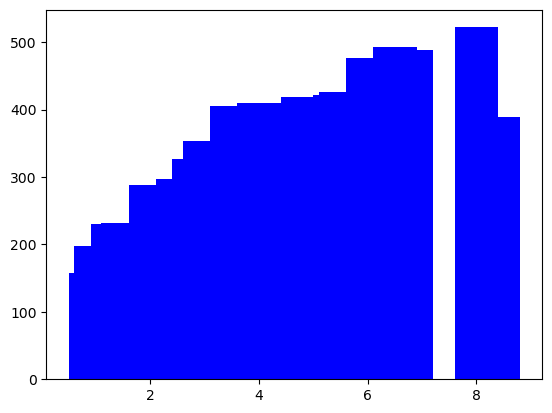

In [27]:
plt.bar(df["engine_size(l)"],df["co2_emissions(g/km)"],color="blue")
plt.show()

In [28]:
from sklearn.model_selection import train_test_split   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)


In [29]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [30]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

In [37]:
accuracy=model.score(X_test,y_test)
accuracy

0.9125612688263743

In [39]:
r2=r2_score(y_train,y_train_pred)
r2


0.9167193578970774

In [41]:
mse=mean_squared_error(y_train,y_train_pred)
mse

286.6898320598824

In [43]:
mae=mean_absolute_error(y_train,y_train_pred)
mae

11.000123402015372

In [45]:
print("Accuracy of Linear Regression Model:",accuracy)
print("MSE of Linear Regression Model:",mse)
print("MAE of Linear Regression Model:",mae)
print("R2 Score of Linear Regression Model:",r2)

Accuracy of Linear Regression Model: 0.9125612688263743
MSE of Linear Regression Model: 286.6898320598824
MAE of Linear Regression Model: 11.000123402015372
R2 Score of Linear Regression Model: 0.9167193578970774


RANDOM FOREST REGRESSOR

In [48]:
from sklearn.model_selection import train_test_split   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [51]:
rfmodel=RandomForestRegressor()
rfmodel.fit(X_train,y_train)

RandomForestRegressor()

In [53]:
y_predicted=rfmodel.predict(X_test)
y_predicted

array([246.66 , 131.04 , 290.57 , ..., 420.27 , 294.05 , 171.143])

In [54]:
y_train_pred = rfmodel.predict(X_train)

In [58]:
accuracy=rfmodel.score(X_test,y_test)
accuracy

0.9978560933627487

In [60]:
r2=r2_score(y_train,y_train_pred)
r2

0.9993908243567173

In [62]:
mse=mean_squared_error(y_train,y_train_pred)
mse

2.097059514164752

In [64]:
mae=mean_absolute_error(y_train,y_train_pred)
mae

0.801014683480027

In [66]:
print("Accuracy of Random Forest Regressor Model:",accuracy)
print("MSE of Random Forest Regressor Model:",mse)
print("MAE of Random Forest Regressor Model:",mae)
print("R2 Score of Random Forest Regressor Model:",r2)

Accuracy of Random Forest Regressor Model: 0.9978560933627487
MSE of Random Forest Regressor Model: 2.097059514164752
MAE of Random Forest Regressor Model: 0.801014683480027
R2 Score of Random Forest Regressor Model: 0.9993908243567173


DECISION TREE REGRESSOR

In [69]:
from sklearn.tree import DecisionTreeRegressor

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [73]:
dtr_model=DecisionTreeRegressor(random_state=101)
dtr_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=101)

In [75]:
y_pred=dtr_model.predict(X_test)

In [77]:
accuracy=dtr_model.score(X_test,y_test)
accuracy

0.996314399324622

In [79]:
r2=r2_score(y_test, y_pred)
r2

0.996314399324622

In [81]:
mse=mean_squared_error(y_test, y_pred)
mse

12.31611355600692

In [83]:
mae=mean_absolute_error(y_test,y_pred)
mae

1.752234258632363

In [85]:
print("Accuracy of Decision Tree Regressor Model:",accuracy)
print("MSE of Decision Tree Regressor Model:",mse)
print("MAE of Decision Tree Regression Model:",mae)
print("R2 Score of Decision Tree Regressor Model:",r2)

Accuracy of Decision Tree Regressor Model: 0.996314399324622
MSE of Decision Tree Regressor Model: 12.31611355600692
MAE of Decision Tree Regression Model: 1.752234258632363
R2 Score of Decision Tree Regressor Model: 0.996314399324622


GRADIO

In [88]:
import pickle
import os
model_file_name="rfr_best_model.pkl"
model_folder="./models/"
os.makedirs(model_folder,exist_ok=True)
with open(os.path.join(model_folder,model_file_name),"wb")as file:
    pickle.dump(rfmodel,file)
    

In [90]:
import gradio as gr
with open(os.path.join(model_folder,model_file_name),"rb")as file:
    model=pickle.load(file)

In [91]:
def predict(*args):
    input_data = pd.DataFrame([args], columns=['make', 'model', 'vehicle_class', 'engine_size(l)', 'cylinders',
       'transmission', 'fuel_type', 'fuel_consumption_city_(l/100_km)',
       'fuel_consumption_hwy_(l/100_km)', 'fuel_consumption_comb_(l/100_km)',
       'fuel_consumption_comb_(mpg)'])  
    prediction = model.predict(input_data)
    return prediction[0]

headline="CO2 Emission Predictor"
iface=gr.Interface(fn=predict,
                   inputs=[
                      gr.Number(label="Make"),
                      gr.Number(label="Model"),
                      gr.Number(label="Vehicle Class"),
                      gr.Number(label="Engine size"),
                      gr.Number(label="Cylinders"),
                      gr.Number(label="Transmission"),
                      gr.Number(label="Fuel type"),
                      gr.Number(label="fuel_consumption_city_(l/100_km)"),
                      gr.Number(label="fuel_consumption_hwy_(l/100_km)"),
                      gr.Number(label="fuel_consumption_comb_(l/100_km)"),
                      gr.Number(label="fuel_consumption_comb_(mpg)'")],
                      
                    outputs=gr.Textbox(label="Predicted Emission"),
                    title=headline)
iface.launch(share=True)
                             

* Running on local URL:  http://127.0.0.1:7860


OSError: [WinError 225] Operation did not complete successfully because the file contains a virus or potentially unwanted software: 'C:\\Users\\ijaza\\anaconda3\\Lib\\site-packages\\gradio\\frpc_windows_amd64_v0.3'